<a href="https://colab.research.google.com/github/rachmadyogoo/pengolahancitra_2025_2/blob/main/Praktikum4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

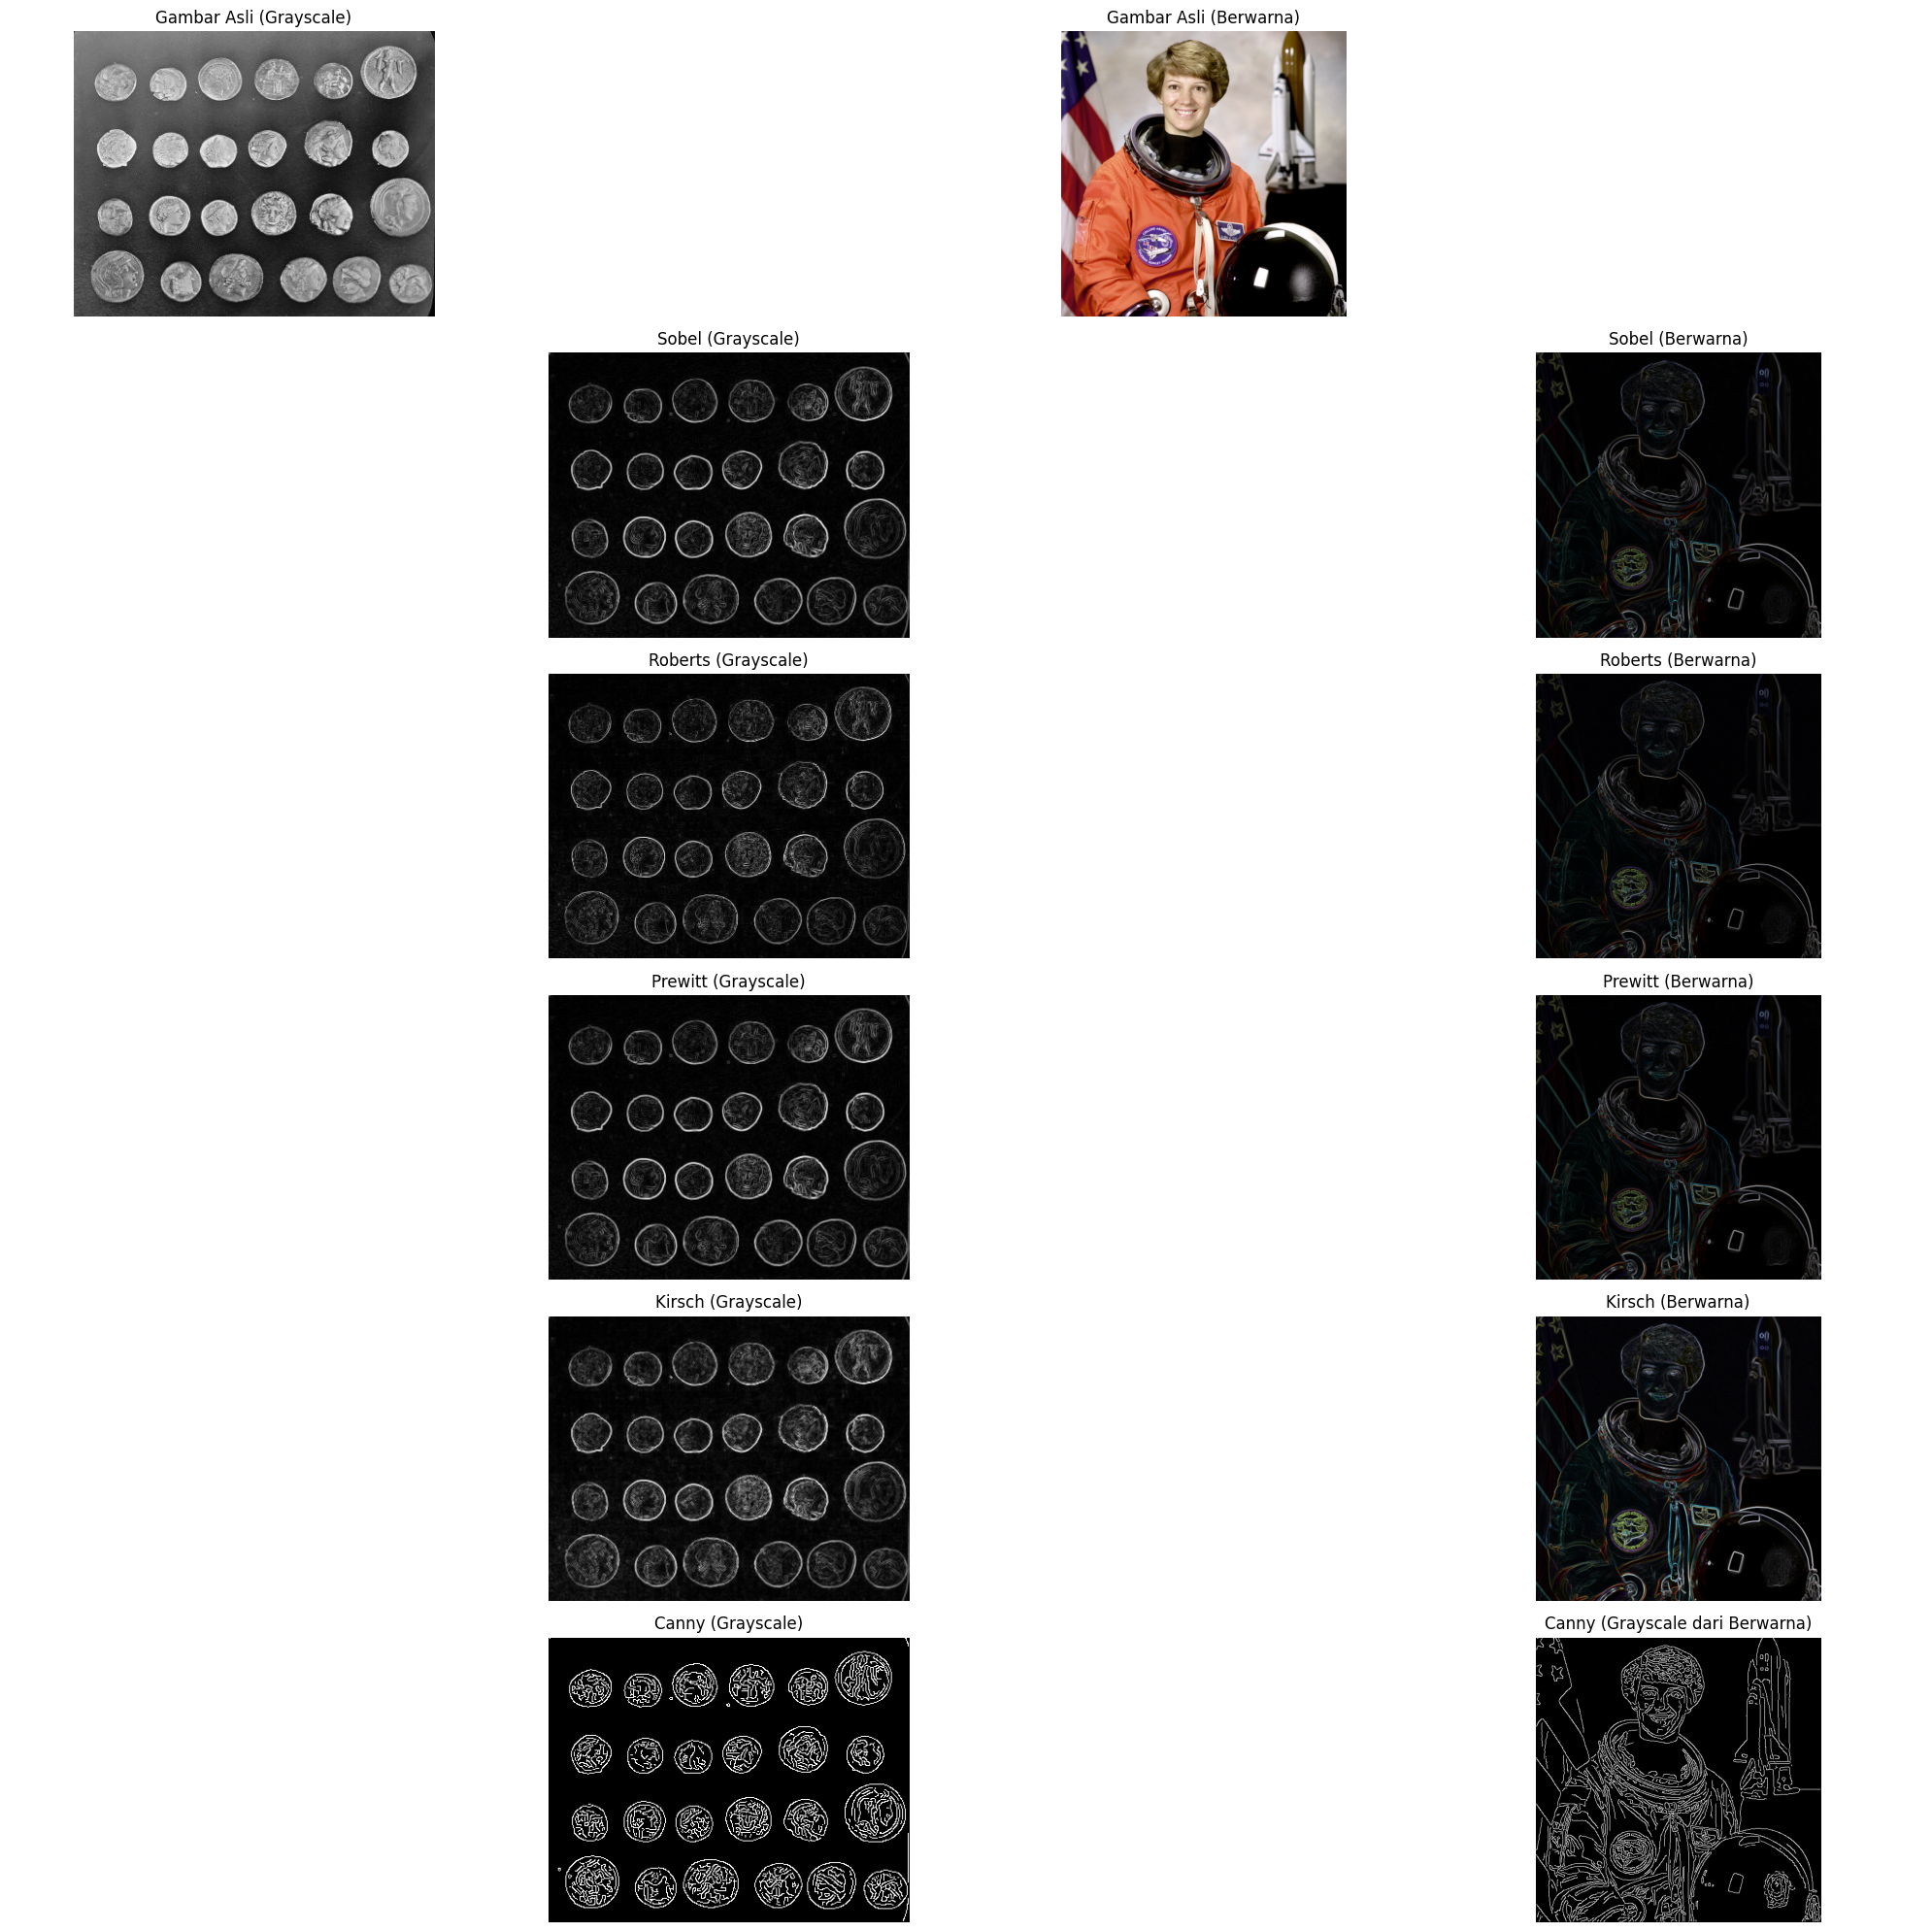

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, filters, feature, color
from skimage.filters.rank import gradient
from skimage.morphology import disk

# ===================== 1⃣ AMBIL GAMBAR GRAYSCALE & BERWARNA =====================
# Menggunakan gambar bawaan dari skimage
image_gray = data.coins()  # Gambar grayscale
image_color = data.astronaut()  # Gambar berwarna

# ===================== 2⃣ TERAPKAN BERBAGAI OPERATOR DETEKSI TEPI =====================
# ----- Pada Gambar Grayscale -----
sobel_gray = filters.sobel(image_gray)
roberts_gray = filters.roberts(image_gray)
prewitt_gray = filters.prewitt(image_gray)
kirsch_gray = gradient(image_gray, disk(1))
canny_gray = feature.canny(image_gray, sigma=1)

# ----- Pada Gambar Berwarna (Per Kanal RGB) -----
def apply_edge_detection(image, operator):
    """Menerapkan operator deteksi tepi pada setiap kanal warna (R, G, B)."""
    red = operator(image[:, :, 0])
    green = operator(image[:, :, 1])
    blue = operator(image[:, :, 2])
    return np.stack((red, green, blue), axis=2)

sobel_color = apply_edge_detection(image_color, filters.sobel)
roberts_color = apply_edge_detection(image_color, filters.roberts)
prewitt_color = apply_edge_detection(image_color, filters.prewitt)
kirsch_color = apply_edge_detection(image_color, lambda img: gradient(img, disk(1)))
canny_color = feature.canny(color.rgb2gray(image_color), sigma=1)  # Canny hanya untuk grayscale

# ===================== 3⃣ VISUALISASI HASIL (FORMAT 4 KOLOM, 6 BARIS) =====================
fig, axes = plt.subplots(6, 4, figsize=(20, 20))
ax = axes.ravel()

# ----- Baris 1: Gambar Asli -----
ax[0].imshow(image_gray, cmap='gray')
ax[0].set_title("Gambar Asli (Grayscale)")
ax[0].axis("off")
ax[1].axis("off")
ax[2].imshow(image_color)
ax[2].set_title("Gambar Asli (Berwarna)")
ax[2].axis("off")
ax[3].axis("off")

# ----- Baris 2: Sobel -----
ax[4].axis("off")
ax[5].imshow(sobel_gray, cmap='gray')
ax[5].set_title("Sobel (Grayscale)")
ax[5].axis("off")
ax[6].axis("off")
ax[7].imshow(sobel_color)
ax[7].set_title("Sobel (Berwarna)")
ax[7].axis("off")

# ----- Baris 3: Roberts -----
ax[8].axis("off")
ax[9].imshow(roberts_gray, cmap='gray')
ax[9].set_title("Roberts (Grayscale)")
ax[9].axis("off")
ax[10].axis("off")
ax[11].imshow(roberts_color)
ax[11].set_title("Roberts (Berwarna)")
ax[11].axis("off")

# ----- Baris 4: Prewitt -----
ax[12].axis("off")
ax[13].imshow(prewitt_gray, cmap='gray')
ax[13].set_title("Prewitt (Grayscale)")
ax[13].axis("off")
ax[14].axis("off")
ax[15].imshow(prewitt_color)
ax[15].set_title("Prewitt (Berwarna)")
ax[15].axis("off")

# ----- Baris 5: Kirsch -----
ax[16].axis("off")
ax[17].imshow(kirsch_gray, cmap='gray')
ax[17].set_title("Kirsch (Grayscale)")
ax[17].axis("off")
ax[18].axis("off")
ax[19].imshow(kirsch_color)
ax[19].set_title("Kirsch (Berwarna)")
ax[19].axis("off")

# ----- Baris 6: Canny -----
ax[20].axis("off")
ax[21].imshow(canny_gray, cmap='gray')
ax[21].set_title("Canny (Grayscale)")
ax[21].axis("off")
ax[22].axis("off")
ax[23].imshow(canny_color, cmap='gray')
ax[23].set_title("Canny (Grayscale dari Berwarna)")
ax[23].axis("off")

plt.tight_layout()
plt.show()
